In [23]:
import requests, StringIO, pandas as pd, json, re

1. Set up and Load the .csv file into the Notebook. In this case, the csv file corresponds to the daily Carbon Monoxide concentration in San Jose, CA for the year 2016. The data being used is recorded at site 60850006.

In [24]:
def get_file_content(credentials):
    """For given credentials, this functions returns a StringIO object containing the file content."""

    url1 = ''.join([credentials['auth_url'], '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': credentials['username'],'domain': {'id': credentials['domain_id']},
            'password': credentials['password']}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                if(e2['interface']=='public'and e2['region']==credentials['region']):
                    url2 = ''.join([e2['url'],'/', credentials['container'], '/', credentials['filename']])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO.StringIO(resp2.content)

In [25]:
credentials_2 = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_3dcf283d_c6e4_4108_ba60_59f7740dc94e',
  'project_id':'8a092154fb6142e3a42279e9573beb5d',
  'region':'dallas',
  'user_id':'5fe906137cc742fbb97cf5dec2fe5242',
  'domain_id':'285a8c899e46433ba3cb7d4d113ca841',
  'domain_name':'1141899',
  'username':'admin_981c75f84a806e031b98937fa367de286a45a2d1',
  'password':"""MCrO.WHU(0r4S0G.""",
  'filename':'ad_viz_plotval_data (3).csv',
  'container':'notebooks',
  'tenantId':'s836-dcc07c0ac5119f-415d45d1026d'
}

In [26]:
content_string = get_file_content(credentials_2)
pollution_df = pd.read_csv(content_string)

2. After the .csv file has been uploaded analyze the data presented by querying the first 5 and the last 5 rows of the datasheet

In [27]:
pollution_df.head()

,Date,AQS_SITE_ID,POC,Daily Max 8-hour CO Concentration,UNITS,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2016,60850006,1,1.2,ppm,14,18,75,42101,Carbon monoxide,41940,"San Jose-Sunnyvale-Santa Clara, CA",6,California,85,Santa Clara,37.338135,-121.849783
1,01/02/2016,60850006,1,1.0,ppm,11,24,100,42101,Carbon monoxide,41940,"San Jose-Sunnyvale-Santa Clara, CA",6,California,85,Santa Clara,37.338135,-121.849783
2,01/03/2016,60850006,1,1.0,ppm,11,24,100,42101,Carbon monoxide,41940,"San Jose-Sunnyvale-Santa Clara, CA",6,California,85,Santa Clara,37.338135,-121.849783
3,01/04/2016,60850006,1,0.9,ppm,10,24,100,42101,Carbon monoxide,41940,"San Jose-Sunnyvale-Santa Clara, CA",6,California,85,Santa Clara,37.338135,-121.849783
4,01/05/2016,60850006,1,0.7,ppm,8,24,100,42101,Carbon monoxide,41940,"San Jose-Sunnyvale-Santa Clara, CA",6,California,85,Santa Clara,37.338135,-121.849783


In [28]:
pollution_df.tail()

,Date,AQS_SITE_ID,POC,Daily Max 8-hour CO Concentration,UNITS,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
205,07/27/2016,60850006,1,0.8,ppm,9,24,100,42101,Carbon monoxide,41940,"San Jose-Sunnyvale-Santa Clara, CA",6,California,85,Santa Clara,37.338135,-121.849783
206,07/28/2016,60850006,1,0.7,ppm,8,24,100,42101,Carbon monoxide,41940,"San Jose-Sunnyvale-Santa Clara, CA",6,California,85,Santa Clara,37.338135,-121.849783
207,07/29/2016,60850006,1,0.5,ppm,6,24,100,42101,Carbon monoxide,41940,"San Jose-Sunnyvale-Santa Clara, CA",6,California,85,Santa Clara,37.338135,-121.849783
208,07/30/2016,60850006,1,0.5,ppm,6,24,100,42101,Carbon monoxide,41940,"San Jose-Sunnyvale-Santa Clara, CA",6,California,85,Santa Clara,37.338135,-121.849783
209,07/31/2016,60850006,1,0.5,ppm,6,24,100,42101,Carbon monoxide,41940,"San Jose-Sunnyvale-Santa Clara, CA",6,California,85,Santa Clara,37.338135,-121.849783


Now that we know the layout of the data spread sheet we can breakdown the data to analyze some specifics. The next query displays the dates of the highest recorded CO concentration and the lowest recorded CO concentration

In [29]:
pollution_df = pollution_df.set_index(pollution_df["Date"])
pollution_df[["Daily Max 8-hour CO Concentration"]].sort_values(by = "Daily Max 8-hour CO Concentration", ascending=False)

,Daily Max 8-hour CO Concentration
Date,
02/09/2016,1.5
02/12/2016,1.4
02/06/2016,1.3
02/10/2016,1.3
02/11/2016,1.3
01/21/2016,1.3
02/05/2016,1.2
02/08/2016,1.2
01/28/2016,1.2


To get a visual representation of the data and to obtain some insights about the CO emissions in San Jose we plot the data in a bar graph and line graph.

In [30]:
%matplotlib inline 

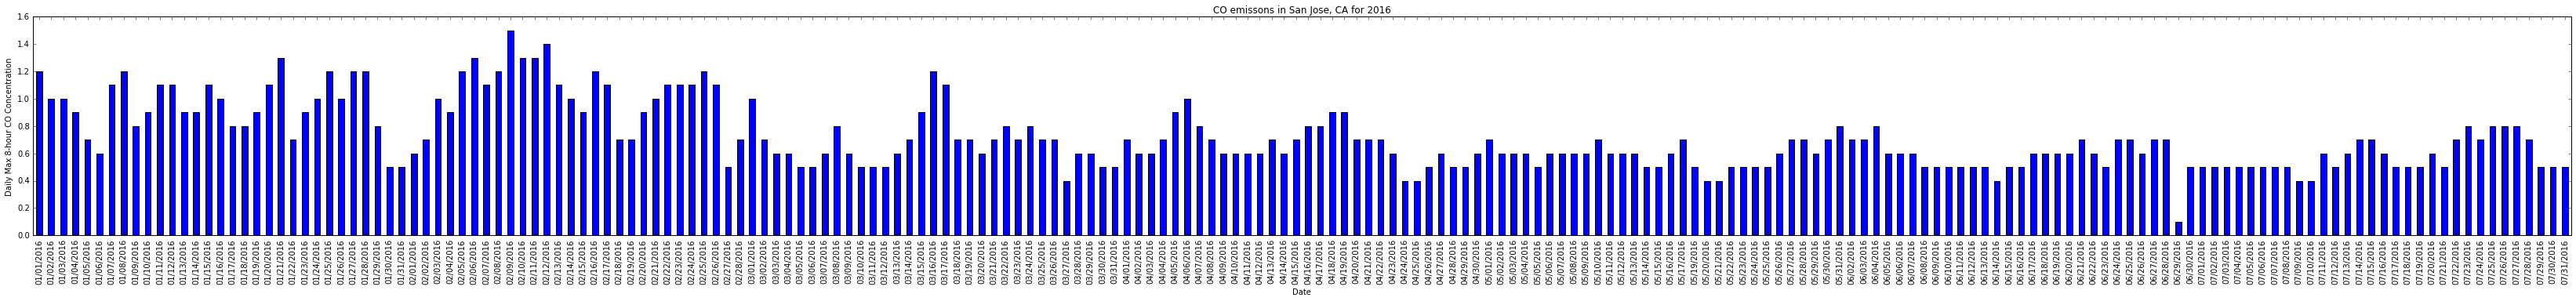

In [31]:
pollution_df = pollution_df.set_index(pollution_df['Date'])
concentration = pollution_df['Daily Max 8-hour CO Concentration']
co_plot = concentration.plot(kind='bar', figsize=(58,5), title="CO emissons in San Jose, CA for 2016")
co_plot.set_ylabel("Daily Max 8-hour CO Concentration")
co_plot.set_xlabel("Date");

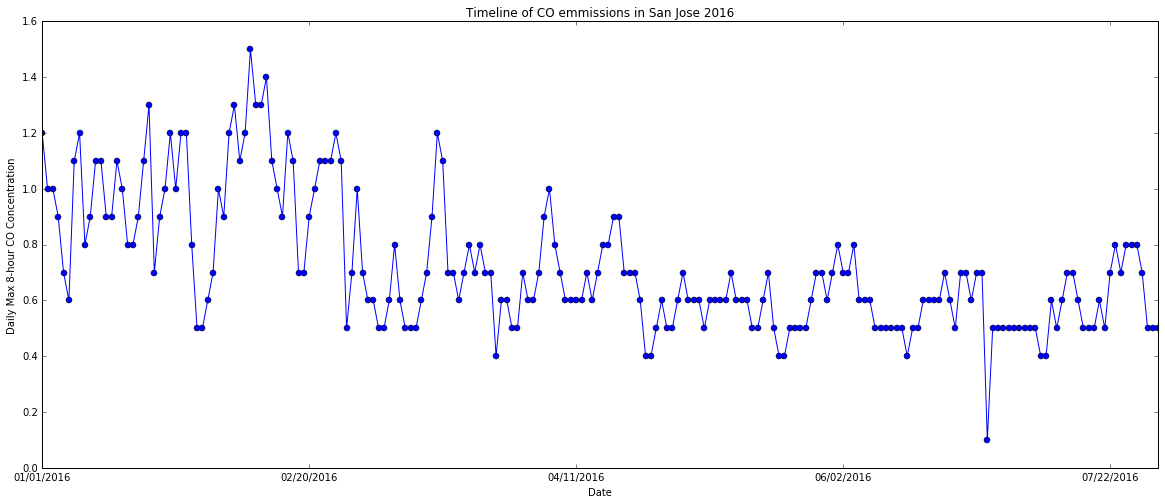

In [32]:
pollution_df = pollution_df.set_index(pollution_df['Date'])
concentration = pollution_df['Daily Max 8-hour CO Concentration']
co_plot = concentration.plot(figsize=(20,8), marker='o', linestyle='-', title="Timeline of CO emmissions in San Jose 2016")
co_plot.set_xlabel("Date")
co_plot.set_ylabel("Daily Max 8-hour CO Concentration");

We can see from the data above that the higher CO concentration is recorded in the months of January-April when compared to the months from May-July. The reasons for this could be that since January-April are winter months more population uses heating appliances which contribute to the CO concentrations. Another cause could be that San Jose State has summer break in the months starting from July so less cars are being driven in the city, thus contributing to lower CO concentration in the summer months. More data is required for further analysis. 